# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE
import seaborn as sns

In [ ]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image

    return image_array, image_label

In [ ]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [ ]:
## load dataset here
df = pd.read_csv("/content/drive/MyDrive/NHẬP MÔN MÁY HỌC /icml_face_data.csv")
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [ ]:
df.emotion.value_counts()

emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64

The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [ ]:
## parsing data here
images, labels = parse_data(df)
images.shape, labels.shape

((35887, 48, 48), (35887,))

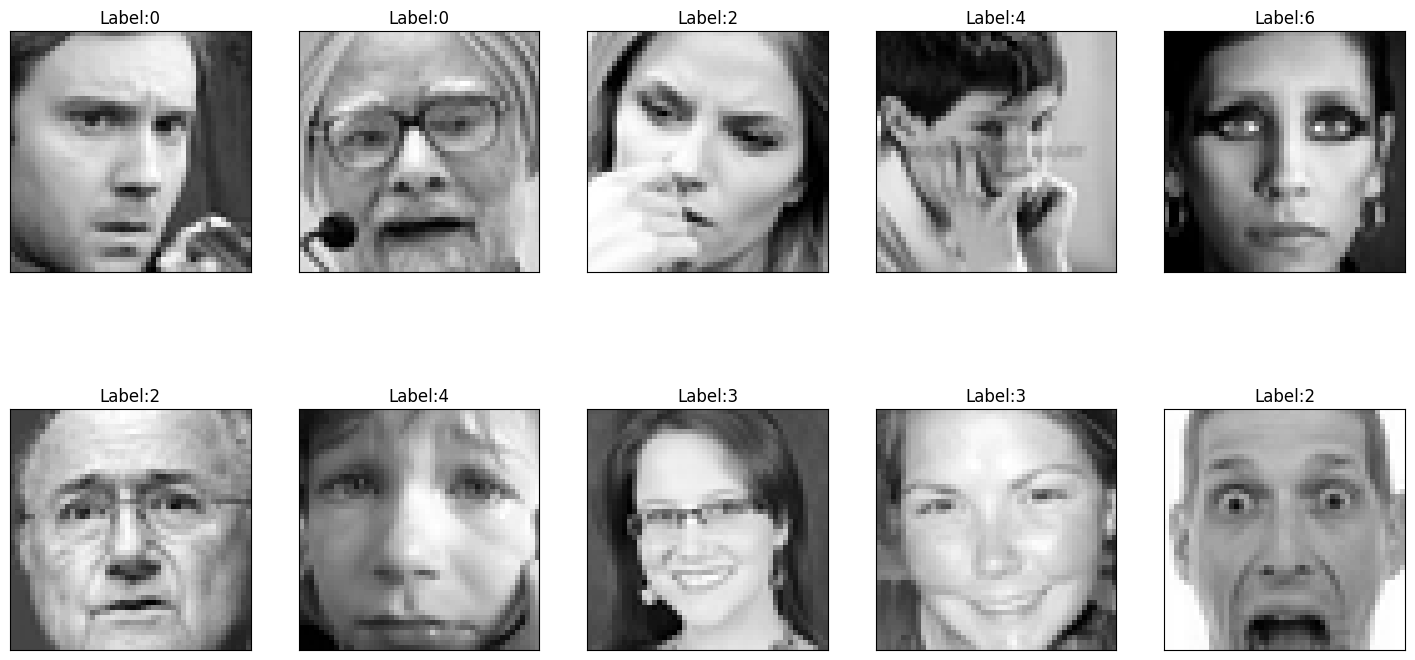

In [ ]:
## showing images here
show_img(images, labels)

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

In [ ]:
from sklearn.decomposition import PCA
def convert_image2D(images):
  print("Hình dạng ban đầu của images:", images.shape)

  if images.ndim == 3:
      num_samples, height, width = images.shape
      images = images.reshape(num_samples, height * width)

  elif images.ndim == 2:
      # Dữ liệu đã ở dạng 2D, không cần chuyển đổi
      raise
  else:
      raise ValueError("The images array must be 2-dimensional or 3-dimensional")
  return images

images = convert_image2D(images)
print("Hình dạng sau khi làm phẳng của images:", images.shape)
pca=PCA(n_components=2)
principal_components = pca.fit_transform(images)
# pca.fit(images) ## modify images' array to the appropriate shape

Hình dạng ban đầu của images: (35887, 48, 48)
Hình dạng sau khi làm phẳng của images: (35887, 2304)


(35887, 2)


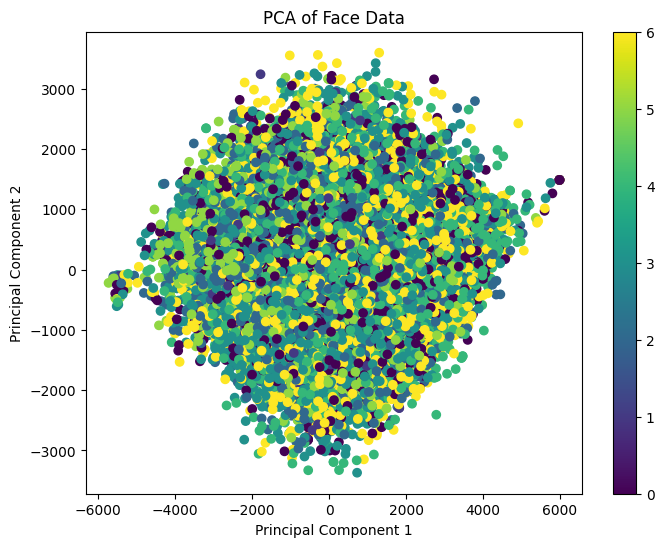

In [ ]:
## transform for visualizing here
images_pca=pca.transform(images) ## modify images' array to the appropriate shape
print(images_pca.shape)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Face Data')
plt.show()

Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

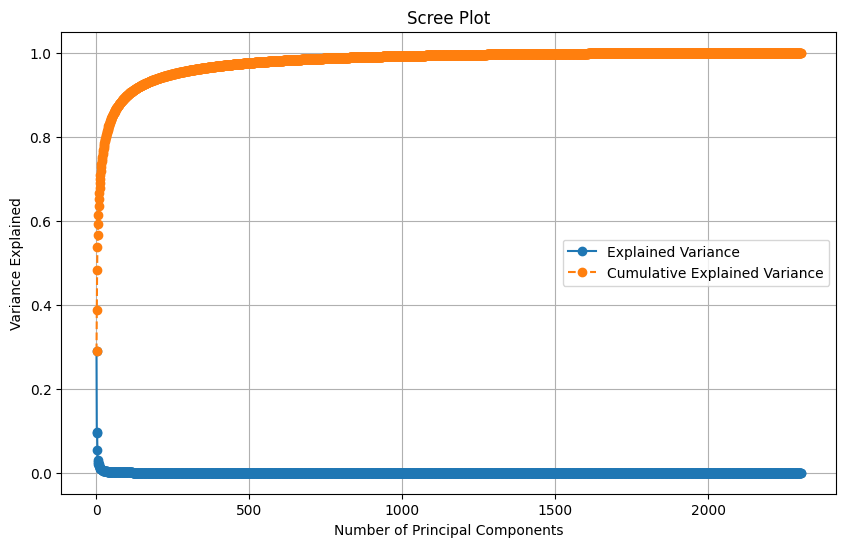

In [ ]:
## determine the optimal number of PCs here
## pca.explained_variance_()
# Để xác định số lượng thành phần chính tối ưu, chúng ta kiểm tra phương sai đượ giải thích thành từng thành phần chính.

# Sử dụng dữ liệu đã làm phẳng từ trước
pca = PCA()
pca.fit(images)

# Phương sai được giải thích bởi từng thành phần chính
explained_variance = pca.explained_variance_ratio_

# Tích lũy phương sai giải thích
cumulative_explained_variance = np.cumsum(explained_variance)

# Vẽ biểu đồ Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', label='Explained Variance')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', label='Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.legend()
plt.grid(True)
plt.show()

Explained variance: Biểu đồ này hiển thị phương sai được giải thích bởi những thành phần chính.

Nếu **đường biểu diễn** phương sai được giải thích **nằm ngang và đậm**, điều này có **nghĩa là** sau một số lượng thành phần chính nhất định, mỗi th**ành phần bổ sung không còn đóng góp đáng kể vào việc giải thích thêm phương sai** trong dữ liệu.

Cụ thể, điều này cho thấy rằng bạn **có thể giảm số lượng thành phần chính mà không mất quá nhiều thông tin**. Trong trường hợp biểu đồ của bạn, sau khoảng **100-200 thành phần chính**, việc thêm thành phần mới không cải thiện đáng kể phương sai được giải thích.

Điều này giúp xác định số lượng thành phần chính tối ưu cho mô hình của bạn, thường là chọn số lượng thành phần tại điểm mà đường phương sai tích lũy đạt khoảng 85-95%.


Cumulative Explained Variance: Biểu đồ này hiển thị phương sai tích lũy được giải thích bới các thành phần chính.

 Ta thấy đường màu cam tăng nhanh từ 0, cho thấy các thành phần đầu tiên giải thích số lượng lớn phương sai. Sai đó đường cong bắt đầu tăng dần khí sối lượng thành phần chính tăng lên.

 Điểm "gãy" (Elbow Point): Khoảng từ **100 đến 200 thành phần chính, đường cong bắt đầu trở nên phẳng**. Điều này cho thấy rằng sau khoảng này, việc thêm các thành phần chính mới không còn cải thiện đáng kể phương sai được giải thích.

 Ban đầu các thành phần chính đầu tiến có phương sai lơn, giải thích phần lớn sự biến đổi trong dữ liệu.

 Phẳng dần: Sau khoảng 600 thành phần chính, mỗi thành phần bổ sung giải thích ít phương sai hơn, và đường màu cam gần như phảng.

 Điều này giúp bản quyết định chọn số lượng thành phần tối ưu để giữ lại thông tin mà không cần quá nhiều thành phần chính. Thông thường, bạn có thể chọn số lượng thành phần chính mà đường màu cam đạt khoảng 85 đến 95 phần trăm



Phương sai tích lũy đạt ngưỡng 95% nghĩa là tổng phương sai được giải thích bởi các thành phần chính đạt đến 95% của tổng phương sai trong dữ liệu ban đầu. Điều này có nghĩa là khi bạn sử dụng số lượng thành phần chính tương ứng, bạn sẽ giữ lại 95% thông tin hoặc sự biến thiên trong dữ liệu ban đầu. Việc đặt ngưỡng này giúp giảm số chiều dữ liệu một cách hiệu quả mà vẫn giữ lại phần lớn thông tin quan trọng của dữ liệu.



In [ ]:
#xác định số lượng thành phàn chính cần thiết để đạt được 95% phương sai tích lũy.
threshold = .95
optimal_pcs = np.argmax(cumulative_explained_variance >= threshold) + 1
print("Optimal number of principal components:", optimal_pcs)

Optimal number of principal components: 255


## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
## splitting data into train/val/test subsets here

pca = PCA(n_components=optimal_pcs)
image_pca = pca.fit_transform(images)
X_train, X_test, y_train, y_test = train_test_split(image_pca, labels, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



MLP after applying PCA

In [ ]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(
    StandardScaler(),
    MLPClassifier(random_state=42)
)

# Define parameter grid for GridSearchCV (Corrected parameter names)
param_grid = {
    'mlpclassifier__hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'mlpclassifier__solver': ['adam', 'sgd'],
    'mlpclassifier__alpha': [0.0001, 0.05],
    'mlpclassifier__learning_rate': ['constant', 'adaptive'],
    'mlpclassifier__max_iter': [200, 400],

}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, n_jobs=-1, cv=2, scoring='accuracy')

# Perform GridSearchCV
grid_result = grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f'Test Accuracy: {test_score}')

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best: 0.6355995886726784 using {'mlpclassifier__alpha': 0.05, 'mlpclassifier__hidden_layer_sizes': (100,), 'mlpclassifier__learning_rate': 'constant', 'mlpclassifier__max_iter': 200, 'mlpclassifier__solver': 'adam'}
Test Accuracy: 0.37768180551685704


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.33      0.31       985
           1       0.22      0.30      0.26       102
           2       0.29      0.33      0.31      1043
           3       0.53      0.50      0.51      1765
           4       0.30      0.27      0.28      1210
           5       0.50      0.52      0.51       795
           6       0.33      0.30      0.32      1278

    accuracy                           0.38      7178
   macro avg       0.35      0.37      0.36      7178
weighted avg       0.38      0.38      0.38      7178



MLP before applying PCA

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
# images_pca=pca.transform(images) ## modify images' array to the appropriate shape
from sklearn.pipeline import make_pipeline

In [ ]:
pipeline = make_pipeline(
    StandardScaler(),
    MLPClassifier(random_state=42)
)

In [ ]:
param_grid = {
    'mlpclassifier__hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'mlpclassifier__solver': ['adam', 'sgd'],
    'mlpclassifier__alpha': [0.0001, 0.05],
    'mlpclassifier__learning_rate': ['constant', 'adaptive'],
    'mlpclassifier__max_iter': [200, 400]
}

In [ ]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, n_jobs=-1, cv=2, scoring='accuracy')
grid_result = grid_search.fit(X_train_resampled, y_train_resampled)
# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f'Test Accuracy: {test_score}')


In [ ]:
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

In [ ]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

SVM with origin data

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Áp dụng PCA để xác định số lượng thành phần chính tối ưu
pca = PCA(n_components = 0.95)  # giữ lại 95% phương sai
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Định nghĩa mô hình SVC
svc = SVC()

# Định nghĩa siêu tham số để điều chỉnh (có thể thay đổi tùy vào từng trường hợp)
param_grid = {
    'C': [1, 10],
    'kernel': ['rbf']
}

# Huấn luyện và Đánh giá mô hình trên dữ liệu gốc
grid_search_svc = GridSearchCV(svc, param_grid, cv=2)
grid_search_svc.fit(X_train, y_train)
best_svc = grid_search_svc.best_estimator_
y_pred_svc = best_svc.predict(X_test)

print("Performance on Original Data:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc)}")
print(f"Precision: {precision_score(y_test, y_pred_svc, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_svc, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred_svc, average='weighted')}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_svc)}")

Performance on Original Data:
Accuracy: 0.47603789356366677
Precision: 0.4771315117478795
Recall: 0.47603789356366677
F1 Score: 0.4743945714572507
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.38      0.37       985
           1       0.84      0.50      0.63       102
           2       0.41      0.38      0.40      1043
           3       0.57      0.66      0.61      1765
           4       0.36      0.35      0.36      1210
           5       0.69      0.58      0.63       795
           6       0.45      0.42      0.43      1278

    accuracy                           0.48      7178
   macro avg       0.52      0.47      0.49      7178
weighted avg       0.48      0.48      0.47      7178



SVM with transformed data

In [ ]:
# Huấn luyện và Đánh giá mô hình trên dữ liệu đã chuyển đổi bằng PCA
grid_search_svc_pca = GridSearchCV(svc, param_grid, cv=2)
grid_search_svc_pca.fit(X_train_pca, y_train)
best_svc_pca = grid_search_svc_pca.best_estimator_
y_pred_svc_pca = best_svc_pca.predict(X_test_pca)

print("\nPerformance on PCA Transformed Data:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc_pca)}")
print(f"Precision: {precision_score(y_test, y_pred_svc_pca, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_svc_pca, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred_svc_pca, average='weighted')}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_svc_pca)}")


Performance on PCA Transformed Data:
Accuracy: 0.4765951518528838
Precision: 0.4768118771516684
Recall: 0.4765951518528838
F1 Score: 0.47450087904934235
Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.38      0.38       985
           1       0.80      0.51      0.62       102
           2       0.42      0.39      0.40      1043
           3       0.55      0.66      0.60      1765
           4       0.37      0.36      0.37      1210
           5       0.68      0.58      0.63       795
           6       0.45      0.41      0.43      1278

    accuracy                           0.48      7178
   macro avg       0.52      0.47      0.49      7178
weighted avg       0.48      0.48      0.47      7178



KNN with original data

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Áp dụng PCA để xác định số lượng thành phần chính tối ưu
pca = PCA(n_components=0.95)  # giữ lại 95% phương sai
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Định nghĩa mô hình KNeighborsClassifier
knn = KNeighborsClassifier()

# Định nghĩa siêu tham số để điều chỉnh (có thể thay đổi tùy vào từng trường hợp)
param_grid = {
    'n_neighbors': [3, 5],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Huấn luyện và Đánh giá mô hình trên dữ liệu gốc
grid_search_knn = GridSearchCV(knn, param_grid, cv=2)
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

print("Performance on Original Data:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(f"Precision: {precision_score(y_test, y_pred_knn, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_knn, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn, average='weighted')}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_knn)}")

Performance on Original Data:
Accuracy: 0.4204513792142658
Precision: 0.42232185913573655
Recall: 0.4204513792142658
F1 Score: 0.4194588258300594
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.34      0.36       985
           1       0.38      0.61      0.47       102
           2       0.42      0.39      0.41      1043
           3       0.48      0.46      0.47      1765
           4       0.38      0.33      0.35      1210
           5       0.55      0.59      0.57       795
           6       0.34      0.42      0.37      1278

    accuracy                           0.42      7178
   macro avg       0.42      0.45      0.43      7178
weighted avg       0.42      0.42      0.42      7178



KNN with transformed data

In [ ]:
# Huấn luyện và Đánh giá mô hình trên dữ liệu đã chuyển đổi bằng PCA
grid_search_knn_pca = GridSearchCV(knn, param_grid, cv=2)
grid_search_knn_pca.fit(X_train_pca, y_train)
best_knn_pca = grid_search_knn_pca.best_estimator_
y_pred_knn_pca = best_knn_pca.predict(X_test_pca)

print("\nPerformance on PCA Transformed Data:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn_pca)}")
print(f"Precision: {precision_score(y_test, y_pred_knn_pca, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_knn_pca, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn_pca, average='weighted')}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_knn_pca)}")


Performance on PCA Transformed Data:
Accuracy: 0.4038729451100585
Precision: 0.40649799388564295
Recall: 0.4038729451100585
F1 Score: 0.4015680919868951
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.29      0.34       985
           1       0.40      0.52      0.45       102
           2       0.42      0.34      0.38      1043
           3       0.44      0.49      0.46      1765
           4       0.36      0.31      0.33      1210
           5       0.54      0.54      0.54       795
           6       0.32      0.41      0.36      1278

    accuracy                           0.40      7178
   macro avg       0.41      0.42      0.41      7178
weighted avg       0.41      0.40      0.40      7178



Random Forest with original data

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Định nghĩa mô hình RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Định nghĩa siêu tham số để điều chỉnh
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Huấn luyện và Đánh giá mô hình trên dữ liệu gốc
grid_search_rf = GridSearchCV(rf, param_grid, cv=2)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("Performance on Original Data:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf, average='weighted')}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")

Performance on Original Data:
Accuracy: 0.4717191418222346
Precision: 0.5027745504514838
Recall: 0.4717191418222346
F1 Score: 0.4501767295424452
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.20      0.30       985
           1       1.00      0.27      0.43       102
           2       0.53      0.26      0.35      1043
           3       0.44      0.81      0.57      1765
           4       0.37      0.38      0.38      1210
           5       0.69      0.58      0.63       795
           6       0.47      0.41      0.44      1278

    accuracy                           0.47      7178
   macro avg       0.58      0.42      0.44      7178
weighted avg       0.50      0.47      0.45      7178



Random Forest with transfromed data

In [ ]:
# Huấn luyện và Đánh giá mô hình trên dữ liệu đã chuyển đổi bằng PCA
grid_search_rf_pca = GridSearchCV(rf, param_grid, cv=2)
grid_search_rf_pca.fit(X_train_pca, y_train)
best_rf_pca = grid_search_rf_pca.best_estimator_
y_pred_rf_pca = best_rf_pca.predict(X_test_pca)

print("\nPerformance on PCA Transformed Data:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_pca)}")
print(f"Precision: {precision_score(y_test, y_pred_rf_pca, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_rf_pca, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf_pca, average='weighted')}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf_pca)}")


Performance on PCA Transformed Data:
Accuracy: 0.40150459738088606
Precision: 0.4999838770035638
Recall: 0.40150459738088606
F1 Score: 0.36768325398303126
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.13      0.21       985
           1       1.00      0.28      0.44       102
           2       0.61      0.21      0.31      1043
           3       0.33      0.88      0.48      1765
           4       0.37      0.24      0.29      1210
           5       0.79      0.44      0.57       795
           6       0.43      0.25      0.32      1278

    accuracy                           0.40      7178
   macro avg       0.60      0.35      0.37      7178
weighted avg       0.50      0.40      0.37      7178



## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(image_pca, labels, test_size=0.2, random_state=42)


In [ ]:
## visualize the confusion matrices and classification reports here
from sklearn.metrics import(
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

import seaborn as sns

In [ ]:
def evaluate_model(model, testX, testY):
    predictions = model.predict(testX)
    accuracy = accuracy_score(testY, predictions)
    precision = precision_score(testY, predictions, average='macro')
    recall = recall_score(testY, predictions, average='macro')
    f1 = f1_score(testY, predictions, average='macro')

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")

    print("\nClassification Report:")
    print(classification_report(testY, predictions))


    return [accuracy, precision, recall, f1]

In [ ]:
mlp = MLPClassifier(
        alpha=0.05,
        hidden_layer_sizes=(100,),
        learning_rate='constant',
        max_iter=200,
        solver='adam'
    )
mlp.fit(X_train_resampled, y_train_resampled)
evaluate_model(mlp, X_test, y_test)

Accuracy: 0.36597938144329895
Precision: 0.35768513973023663
Recall: 0.3668663228269612
F1-Score: 0.35098456815882784

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.34      0.28       985
           1       0.32      0.39      0.35       102
           2       0.26      0.37      0.31      1043
           3       0.47      0.54      0.50      1765
           4       0.34      0.14      0.20      1210
           5       0.49      0.55      0.52       795
           6       0.38      0.24      0.29      1278

    accuracy                           0.37      7178
   macro avg       0.36      0.37      0.35      7178
weighted avg       0.37      0.37      0.36      7178



[0.36597938144329895,
 0.35768513973023663,
 0.3668663228269612,
 0.35098456815882784]

In [ ]:
from sklearn.svm import SVC
svm = SVC(C = 10, kernel = 'rbf')
svm.fit(X_train_resampled, y_train_resampled)

evaluate_model(svm, X_test, y_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Định nghĩa mô hình KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,weights = 'distance', metric = 'manhattan')
knn.fit(X_train_resampled, y_train_resampled)
evaluate_model(knn, X_test, y_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Định nghĩa mô hình RandomForestClassifier
rf = RandomForestClassifier(n_estimators='100',max_depth= 20, min_samples_split = 2, min_samples_leaf = 1)
rf.fit(X_train_resampled, y_train_resampled)
evaluate_model(rf, X_test, y_test)
